<a href="https://colab.research.google.com/github/sandhiya0147/Data_Science/blob/main/modelbuilding1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BANK PERSONAL LOAN MODEL:**

IMPORT LIBRARIES:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATA:

In [2]:
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

BASIC ANALYSIS:

In [3]:
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [4]:
print(df.tail())

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           

VISUAL ANALYSIS:

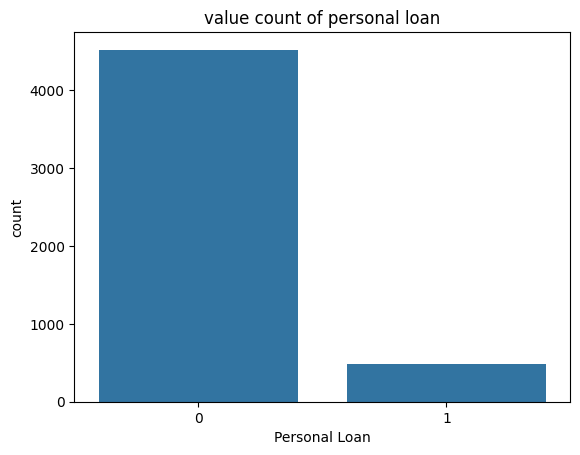

In [5]:
sns.countplot(x='Personal Loan', data=df)
plt.title('value count of personal loan')
plt.show()

MODEL BUILDING:

**Random Forest Classifier**:

In [6]:
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state =42)
x_train.shape, x_test.shape


((3500, 13), (1500, 13))

In [8]:
import time
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(
    random_state=41,
    n_jobs=-1,
    max_depth=5,
    n_estimators=100,
    oob_score=True
)

start_time = time.time()
classifier_rf.fit(x_train, y_train)
end_time = time.time()

print(f"Training completed in {end_time - start_time:.4f} seconds")

Training completed in 0.3828 seconds


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier_rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1341    2]
 [  47  110]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.98      0.70      0.82       157

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.96      1500



FEATURE IMPORTANCE VIZUALIZATION:

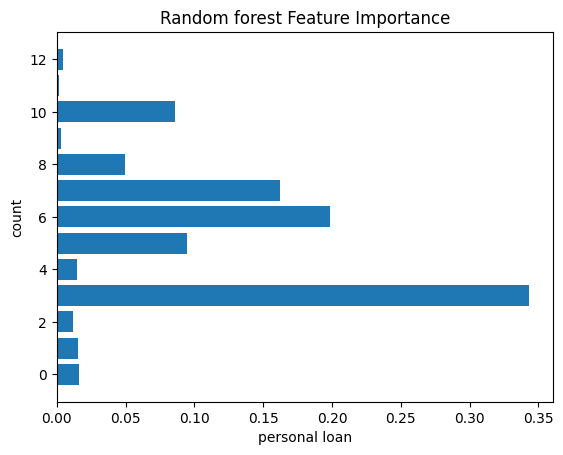

In [10]:
import matplotlib.pyplot as plt
importances = classifier_rf.feature_importances_
plt.barh(range(len(importances)), importances)
plt.xlabel('personal loan')
plt.ylabel('count')
plt.title('Random forest Feature Importance')
plt.show()